In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
pd.set_option('display.max_columns',None)
burnout = pd.read_excel('/content/1719220150-employee_burnout_analysis-AI (1).xlsx')
display(burnout.head())

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
burnout["Date of Joining"] = pd.to_datetime(burnout["Date of Joining"])

In [ ]:
burnout.shape

(22750, 9)

In [ ]:
burnout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
burnout.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [ ]:
burnout.duplicated().sum()

np.int64(0)

In [ ]:
burnout.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [ ]:
for i,col in  enumerate(burnout.columns):
  print(f"\n\n {burnout[col].unique()}")
  print(f"\n\n {burnout[col].value_counts()}\n\n")



 ['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']


 Employee ID
fffe3400350031003800        1
fffe32003000360033003200    1
fffe3700360033003500        1
fffe31003300320037003900    1
fffe32003400380032003900    1
                           ..
fffe31003000380035003800    1
fffe31003500350030003400    1
fffe33003200360037003000    1
fffe31003700350033003100    1
fffe33003100330036003300    1
Name: count, Length: 22750, dtype: int64




 <DatetimeArray>
['2008-09-30 00:00:00', '2008-11-30 00:00:00', '2008-03-10 00:00:00',
 '2008-11-03 00:00:00', '2008-07-24 00:00:00', '2008-11-26 00:00:00',
 '2008-01-02 00:00:00', '2008-10-31 00:00:00', '2008-12-27 00:00:00',
 '2008-03-09 00:00:00',
 ...
 '2008-05-24 00:00:00', '2008-06-10 00:00:00', '2008-03-31 00:00:00',
 '2008-12-01 00:00:00', '2008-01-05 00:00:00', '2008-09-15 00:00:00',
 '2008-12-10 00:00:00', '2008-02-10 00:00:00', '2008-12-0

In [ ]:
burnout = burnout.drop(["Employee ID"] ,axis =1)

In [ ]:
intFloatburnout = burnout.select_dtypes([np.int64,np.float64])
for i,col in enumerate(intFloatburnout.columns):
  if (intFloatburnout[col].skew() >=0.1):
    print(f"{col} : {intFloatburnout[col].skew()}")
  elif(intFloatburnout[col].skew() <=-0.1):
    print(f"{col} : {intFloatburnout[col].skew()}")
  else:
    print("\n",col,"feature is Normally Distributedand value is:",intFloatburnout[col].skew())


 Designation feature is Normally Distributedand value is: 0.09242138478903683
Resource Allocation : 0.20457273454318103
Mental Fatigue Score : -0.4308950578815428

 Burn Rate feature is Normally Distributedand value is: 0.045737370909640515


In [ ]:
burnout.isnull().sum()

,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [ ]:
burnout['Resource Allocation'].fillna(burnout['Resource Allocation'].mean(),inplace=True)
burnout['Mental Fatigue Score'].fillna(burnout['Mental Fatigue Score'].mean(),inplace=True)
burnout['Burn Rate'].fillna(burnout['Burn Rate'].mean(),inplace=True)

In [ ]:
burnout.isnull().sum()

,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,0
Mental Fatigue Score,0
Burn Rate,0


In [ ]:
burnout.select_dtypes(include=np.number).corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.852046,0.656445,0.719284
Resource Allocation,0.852046,1.000000,0.739268,0.811062
Mental Fatigue Score,0.656445,0.739268,1.000000,0.878217
Burn Rate,0.719284,0.811062,0.878217,1.000000


In [ ]:
corr = burnout.select_dtypes(include=np.number).corr()
sns.set(rc={"figure.figsize":(14,12)})
fig= px.imshow(corr,text_auto=True,aspect='auto')
fig

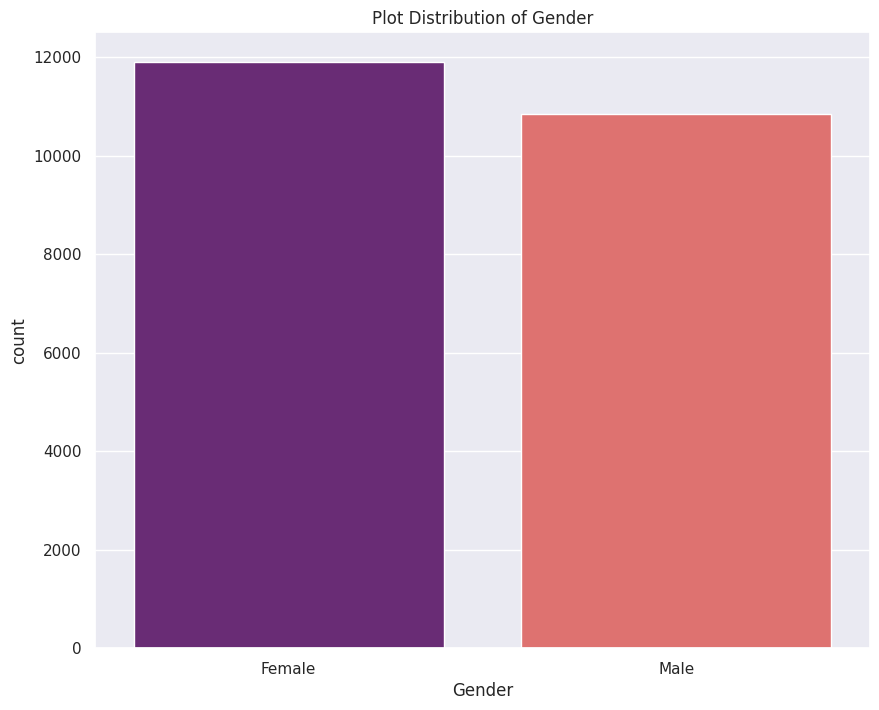

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='Gender',palette="magma",data=burnout)
plt.title("Plot Distribution of Gender")
plt.show()

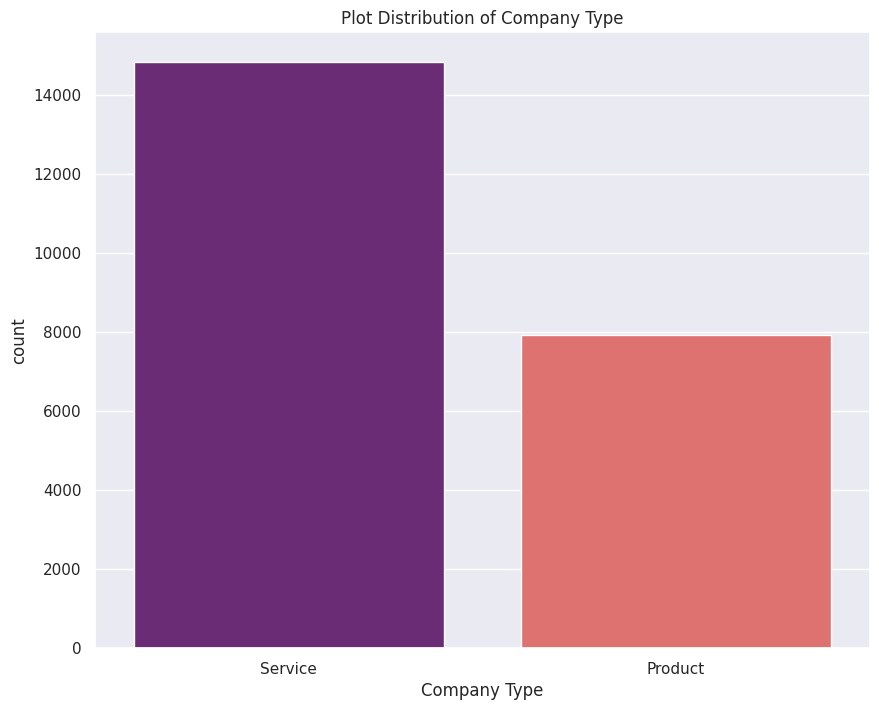

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='Company Type',palette="magma",data=burnout)
plt.title("Plot Distribution of Company Type")
plt.show()

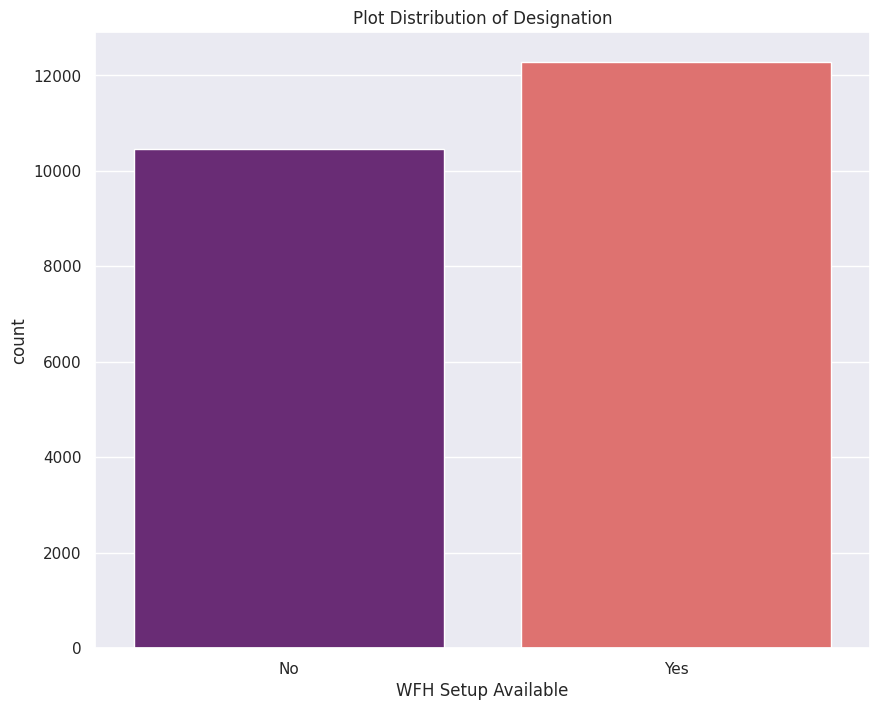

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='WFH Setup Available',palette="magma",data=burnout)
plt.title("Plot Distribution of Designation")
plt.show()

In [ ]:
burn_st = burnout.loc[:,'Date of Joining':'Burn Rate']
burn_st = burn_st.select_dtypes([int ,float])
for i,col in enumerate(burn_st.columns):
  fig = px.histogram(burn_st,x=col,title = "Plot Distibution of "+col,color_discrete_sequence=['indianred'])
  fig.update_layout(bargap=0.2)
  fig.show()

In [ ]:
fig = px.line(burnout,y ="Burn Rate",color="Designation",title="Plot Distibution of Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

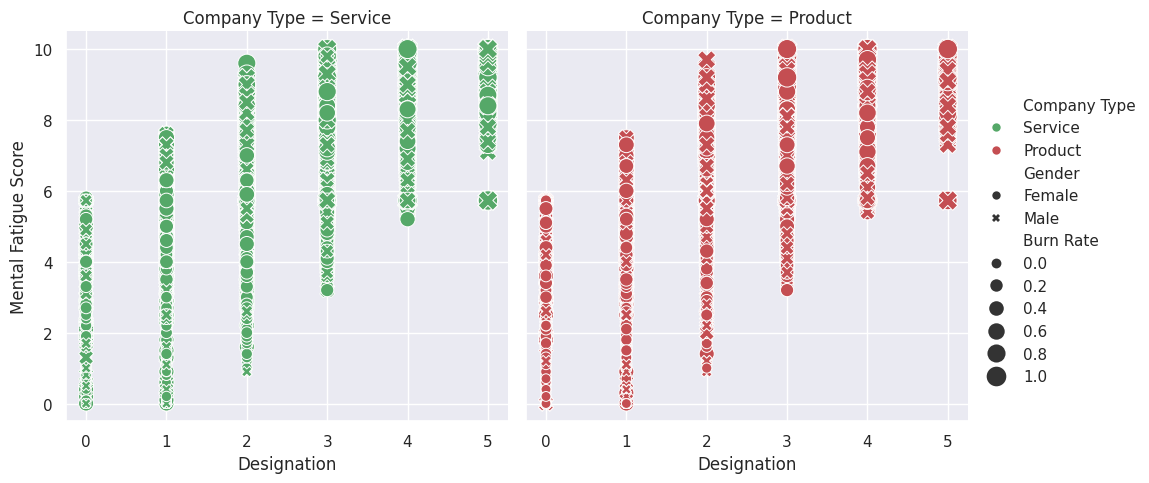

In [ ]:
sns.relplot(
    data = burnout,x= "Designation",y="Mental Fatigue Score", col="Company Type",
    hue ="Company Type",size="Burn Rate",style="Gender",
    palette=["g","r"],sizes=(50,200)
)

In [ ]:
from sklearn import preprocessing
Label_encode = preprocessing.LabelEncoder()

In [ ]:
burnout['GenderLable'] = Label_encode.fit_transform(burnout['Gender'].values)
burnout['Company TypeLable'] = Label_encode.fit_transform(burnout['Company Type'].values)
burnout['WFH Setup AvailableLable'] = Label_encode.fit_transform(burnout['WFH Setup Available'].values)

In [ ]:
gn = burnout.groupby('Gender')
gn = gn['GenderLable']
gn.first()

,GenderLable
Gender,
Female,0
Male,1


In [ ]:
ct = burnout.groupby('Company Type')
ct = ct['Company TypeLable']
ct.first()

,Company TypeLable
Company Type,
Product,0
Service,1


In [ ]:
wsa  = burnout.groupby('WFH Setup Available')
wsa = wsa['WFH Setup AvailableLable']
wsa.first()

,WFH Setup AvailableLable
WFH Setup Available,
No,0
Yes,1


In [ ]:
burnout.tail(10)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLable,Company TypeLable,WFH Setup AvailableLable
22740,2008-09-05,Female,Product,No,3,6.0,7.300000,0.550000,0,0,0
22741,2008-01-07,Male,Product,No,2,5.0,6.000000,0.452005,1,0,0
22742,2008-07-28,Male,Product,No,3,5.0,8.100000,0.690000,1,0,0
22743,2008-12-15,Female,Product,Yes,1,3.0,6.000000,0.480000,0,0,1
22744,2008-05-27,Male,Product,No,3,7.0,6.200000,0.540000,1,0,0
22745,2008-12-30,Female,Service,No,1,3.0,5.728188,0.410000,0,1,0
22746,2008-01-19,Female,Product,Yes,3,6.0,6.700000,0.590000,0,0,1
22747,2008-11-05,Male,Service,Yes,3,7.0,5.728188,0.720000,1,1,1
22748,2008-01-10,Female,Service,No,2,5.0,5.900000,0.520000,0,1,0
22749,2008-01-06,Male,Product,No,3,6.0,7.800000,0.610000,1,0,0


In [ ]:
columns = ['Designation',	'Resource Allocation',	'Mental Fatigue Score',	'GenderLable',	'Company TypeLable'	,'WFH Setup AvailableLable']
x = burnout[columns]
y = burnout['Burn Rate']

In [ ]:
print(x)

       Designation  Resource Allocation  Mental Fatigue Score  GenderLable  \
0                2             3.000000              3.800000            0   
1                1             2.000000              5.000000            1   
2                2             4.481398              5.800000            0   
3                1             1.000000              2.600000            1   
4                3             7.000000              6.900000            0   
...            ...                  ...                   ...          ...   
22745            1             3.000000              5.728188            0   
22746            3             6.000000              6.700000            0   
22747            3             7.000000              5.728188            1   
22748            2             5.000000              5.900000            0   
22749            3             6.000000              7.800000            1   

       Company TypeLable  WFH Setup AvailableLable  
0         

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
x_pca = pca.fit_transform(x)

print("PCA shape of x is :",x_pca.shape,"and orignal shape is :",x.shape)
print("% of importance of selection is:",pca.explained_variance_ratio_)
print("The number of feature selected through PCa is :",pca.n_components_)

PCA shape of x is : (22750, 4) and orignal shape is : (22750, 6)
% of importance of selection is: [0.78371089 0.11113597 0.03044541 0.02632422]
The number of feature selected through PCa is : 4


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.25,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17062, 4)
(5688, 4)
(17062,)
(5688,)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

train_pred = rf_model.predict(x_train)
test_pred = rf_model.predict(x_test)

train_score = r2_score(y_train,train_pred)
test_score = r2_score(y_test,test_pred)

print("Train Score is :",train_score*100 )
print("Test Score is :",test_score*100 )

Train Score is : 91.2699357951366
Test Score is : 83.76124284509379


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
abr_model = AdaBoostRegressor()
abr_model.fit(x_train,y_train)

train_pred = abr_model.predict(x_train)
test_pred = abr_model.predict(x_test)

train_score = r2_score(y_train,train_pred)
test_score = r2_score(y_test,test_pred)

print("Train Score is :",train_score*100 )
print("Test Score is :",test_score*100 )

Train Score is : 76.88584958926809
Test Score is : 76.70469088896166
